In [14]:
# Reference: https://mp.weixin.qq.com/s/tVxalBWsxLn58RJkpb-PaQ
# Image: R4.4 /software/miniconda/envs/R/bin/R
library(MetaNeighbor)
library(SummarizedExperiment)
library(Seurat)
library(SingleCellExperiment)
library(ambient)
library(grid)
library(ComplexHeatmap)
library(ggcor)
library(ggplot2)
library(optparse)

# option_list <- list(
#   make_option(c("-i", "--input_file"),
#     type = "character", default = "/data/work/integration/input/Peanut-unsoupx.cg.rds",
#     help = "Path to input file"
#   ),
#   make_option(c("-o", "--output_name"),
#     type = "character", default = "peanut",
#     help = "Output file prefix name"
#   ),
#   make_option(c("-b", "--batch_key"),
#     type = "character", default = "biosample",
#     help = "Batch key for integration"
#   ),
#   make_option(c("-c", "--cluster_key"),
#     type = "character", default = "leiden_res_0.50",
#     help = "Cluster key for integration"
#   )
# )
# opt <- parse_args(OptionParser(option_list = option_list))
# input_file <- opt$input_file
# out_put_name <- opt$output_name
# batch_key <- opt$batch_key
# cluster_key <- opt$cluster_key

Warning message:
“replacing previous import ‘stats::filter’ by ‘dplyr::filter’ when loading ‘ggcirclize’”
  ggcirclize version 0.0.2

  Github page: https://github.com/junjunlab/ggcirclize
  Documentation: https://junjunlab.github.io/ggcirclize-manual/

  The ggcirclize is currently on developing.
  We strongly recommend that you do not rely on this for production, but,
  feel free to explore. If you encounter a clear bug, please file a
  minimal reproducible example at https://github.com/junjunlab/ggcirclize/issues.
  For questions and other discussion, please use,
  https://github.com/junjunlab/ggcirclize/issues.

  This message can be suppressed by:
  suppressPackageStartupMessages(library(ggcirclize))
  



In [15]:
input_file <- "/data/work/integration/input/Peanut-unsoupx.cg.rds"
out_put_name <- "peanut"
batch_key <- "biosample"
cluster_key <- "leiden_res_0.50"

In [4]:
sdata <- readRDS(input_file)
sdata
colnames(sdata@meta.data)
sdata <- as.SingleCellExperiment(sdata)
head(colData(sdata))

var_genes = variableGenes(dat = sdata, exp_labels = sdata@colData[[batch_key]])

celltype_NV = MetaNeighborUS(var_genes = var_genes,
                             dat = sdata,
                             study_id = sdata@colData[[batch_key]],
                             cell_type = sdata@colData[[cluster_key]],
                             fast_version = TRUE)

An object of class Seurat 
39118 features across 25566 samples within 1 assay 
Active assay: RNA (39118 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: Xpca_, Xumap_

[1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "_index"                     
 [5] "sample"                      "n_genes_by_counts"          
 [7] "log1p_n_genes_by_counts"     "total_counts"               
 [9] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
[11] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
[13] "pct_counts_in_top_500_genes" "n_genes"                    
[15] "doublet_score"               "predicted_doublet"          
[17] "leiden"                      "leiden_res_0.02"            
[19] "leiden_res_0.50"             "leiden_res_2.00"            
[21] "biosample"

Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


DataFrame with 6 rows and 22 columns
             orig.ident nCount_RNA nFeature_RNA     X_index              sample
               <factor>  <numeric>    <integer> <character>         <character>
CELL17_N2 SeuratProject        619          406   CELL17_N2 HS-V3RNA24120200006
CELL18_N7 SeuratProject       4420         1642   CELL18_N7 HS-V3RNA24120200006
CELL22_N3 SeuratProject       1168          772   CELL22_N3 HS-V3RNA24120200006
CELL25_N4 SeuratProject        790          466   CELL25_N4 HS-V3RNA24120200006
CELL27_N2 SeuratProject        553          366   CELL27_N2 HS-V3RNA24120200006
CELL37_N3 SeuratProject        997          578   CELL37_N3 HS-V3RNA24120200006
          n_genes_by_counts log1p_n_genes_by_counts total_counts
                  <integer>               <numeric>    <numeric>
CELL17_N2               409                 6.01616          622
CELL18_N7              1655                 7.41216         4434
CELL22_N3               778                 6.65801         117

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.9 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.9 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.6 GiB”


In [5]:
head(celltype_NV)

,stim|0,stim|1,stim|2,stim|3,stim|4,stim|5,stim|6,stim|7,ctrl|0,ctrl|1,ctrl|2,ctrl|3,ctrl|4,ctrl|5,ctrl|6,ctrl|7
stim|0,0.8880492,0.1913376,0.5772261,0.4476754,0.7164261,0.3694205,0.6674001,0.7385320,0.7780164,0.2008089,0.7258082,0.5018658,0.5098691,0.2557051,0.7659304,0.6829031
stim|1,0.1913376,0.9879833,0.1210354,0.1628377,0.3010276,0.6416356,0.2281442,0.1827890,0.1862065,0.9703586,0.2954117,0.1477786,0.3252693,0.7436120,0.1180768,0.2146215
stim|2,0.5772261,0.1210354,0.9557267,0.7022693,0.4508323,0.2283375,0.4812523,0.6224120,0.7535090,0.2482139,0.5370175,0.6810388,0.3805928,0.3063122,0.7890645,0.6092263
stim|3,0.4476754,0.1628377,0.7022693,0.9930257,0.3750220,0.7451351,0.6712876,0.6508678,0.3906541,0.1509473,0.5363777,0.9823204,0.8310395,0.5944907,0.5437599,0.4824149
stim|4,0.7164261,0.3010276,0.4508323,0.3750220,0.9887443,0.3670265,0.6918270,0.6114424,0.7614325,0.3390967,0.4924506,0.4832399,0.4490530,0.3700153,0.6091844,0.6753862
stim|5,0.3694205,0.6416356,0.2283375,0.7451351,0.3670265,0.9951550,0.5056006,0.4570417,0.2386798,0.4248765,0.4572020,0.5378492,0.9595959,0.9637822,0.2844981,0.3025546


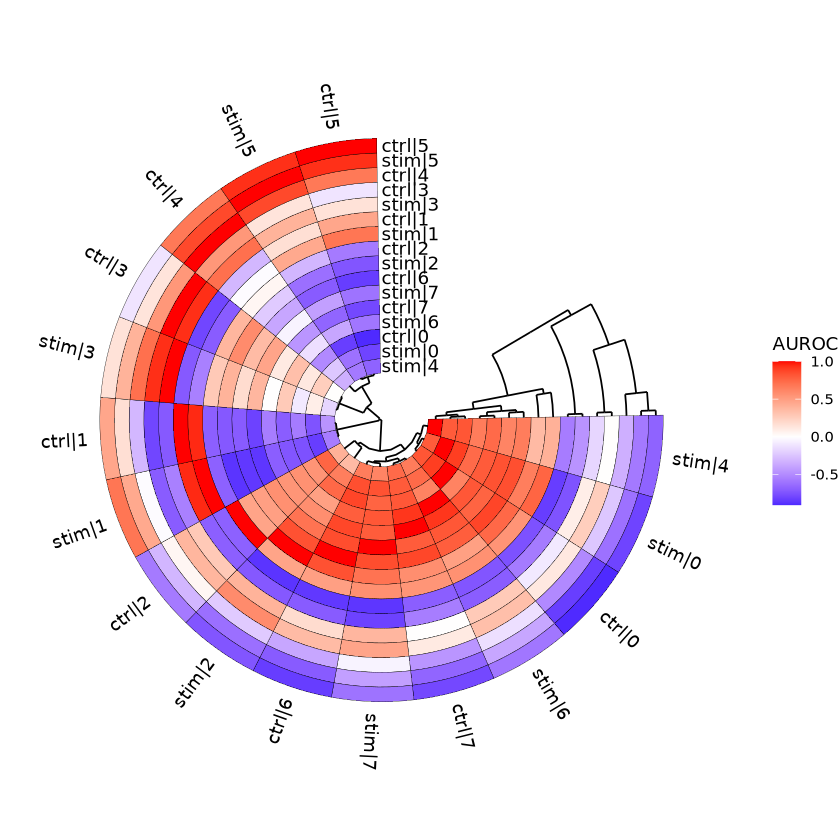

In [43]:
p1 <- quickcor(celltype_NV, circular = TRUE, cluster = TRUE, grid.colour = 'white',
         open = 90, # 缺口大小
         # 内圈外圈比例
         outer = 0.1, inner = 0.2) +
  # 单元格边框线颜色
  geom_colour(colour = 'black') +
  # 自定义填充颜色
  scale_fill_gradient2(low = 'blue', mid = 'white', high = 'red') +
  # 更改图例名称
  guides(fill = guide_colorbar(title = 'AUROC')) +
  anno_col_tree() +
  anno_row_tree() +
  # 基因名
  set_p_yaxis() +
  # 样本名
  set_p_xaxis()
p1

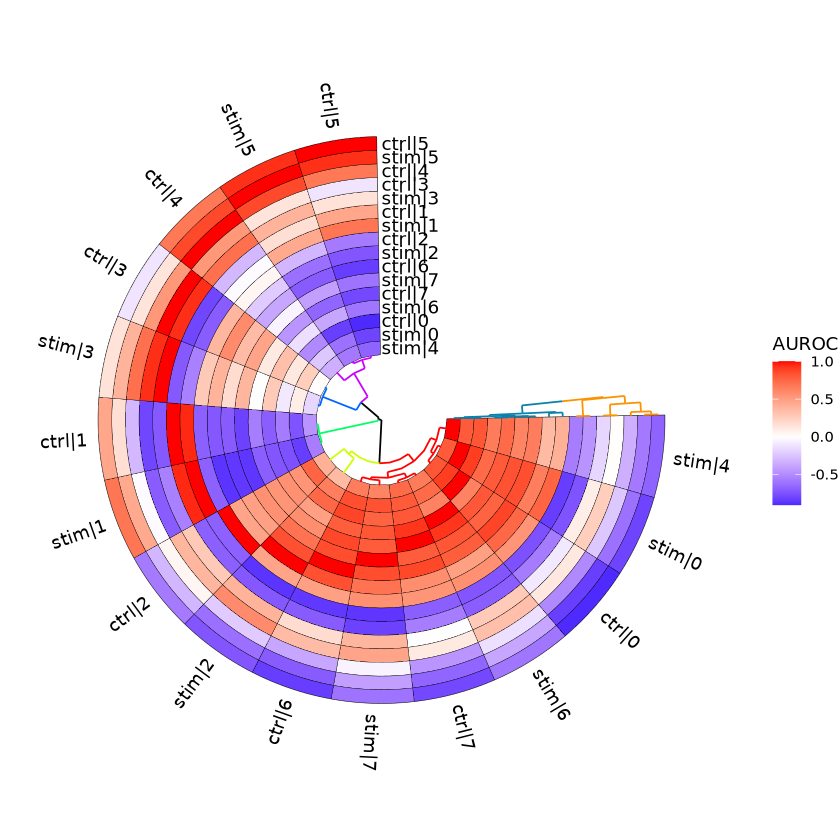

In [41]:
p2 <- quickcor(celltype_NV, circular = TRUE, cluster = TRUE,
         open = 90, # 缺口大小
         # 内圈外圈比例
         outer = 0.1, inner = 0.3) +
  # 单元格边框线颜色
  geom_colour(colour = 'black') +
  # 自定义填充颜色
  scale_fill_gradient2(low = 'blue', mid = 'white', high = 'red') +
  # 更改图例名称
  guides(fill = guide_colorbar(title = 'AUROC')) +
  # 添加聚类树
  anno_col_tree(height = 0.05, bcols = c('#0A81AB','#FB9300')) +
  anno_row_tree(pos = 'left', bcols = rainbow(5)) +
  # 基因名
  set_p_yaxis() +
  # 样本名
  set_p_xaxis()
p2

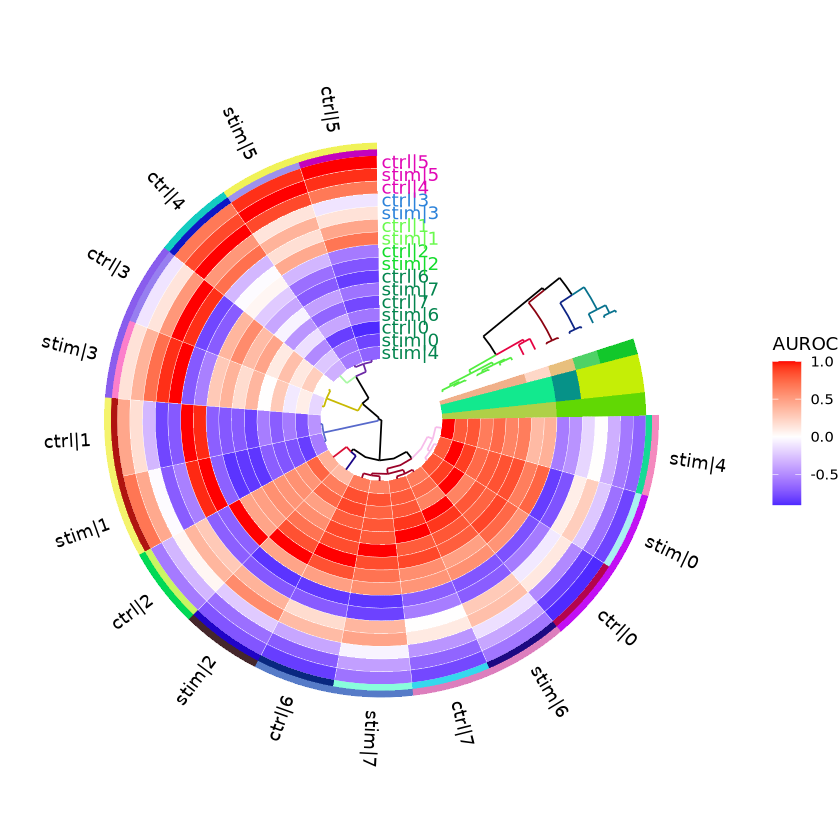

In [40]:
p3 <- quickcor(celltype_NV, circular = TRUE, cluster = TRUE, grid.colour = 'white',
         open = 90, # 缺口大小
         # 内圈外圈比例
         outer = 0.2, inner = 0.3) +
  # 单元格边框线颜色
  geom_colour(colour = 'white') +
  # 自定义填充颜色
  scale_fill_gradient2(low = 'blue', mid = 'white', high = 'red') +
  # 更改图例名称
  guides(fill = guide_colorbar(title = 'AUROC')) +
  # 列注释
  anno_hc_bar(k = 2, fill = rand_color(2), pos = 'top', height = 0.3) +
  anno_hc_bar(k = 3, fill = rand_color(3), pos = 'top', height = 0.5) +
  anno_hc_bar(k = 5, fill = rand_color(5), pos = 'top', height = 0.2) +
  # 添加聚类树
  anno_col_tree(bcols = rand_color(5), height = 0.15) +
  anno_hc_bar(k = 15, fill = rand_color(15), pos = 'left', width = 0.5) +
  anno_hc_bar(k = 10, fill = rand_color(10), pos = 'left', width = 0.5) +
  anno_row_tree(bcols = rand_color(8)) +

  # 样本名
  set_p_xaxis(bcols = rand_color(5)) +
  # 基因名
  set_p_yaxis()
p3

Note: 16 points are out of plotting region in sector 'group', track
'3'.



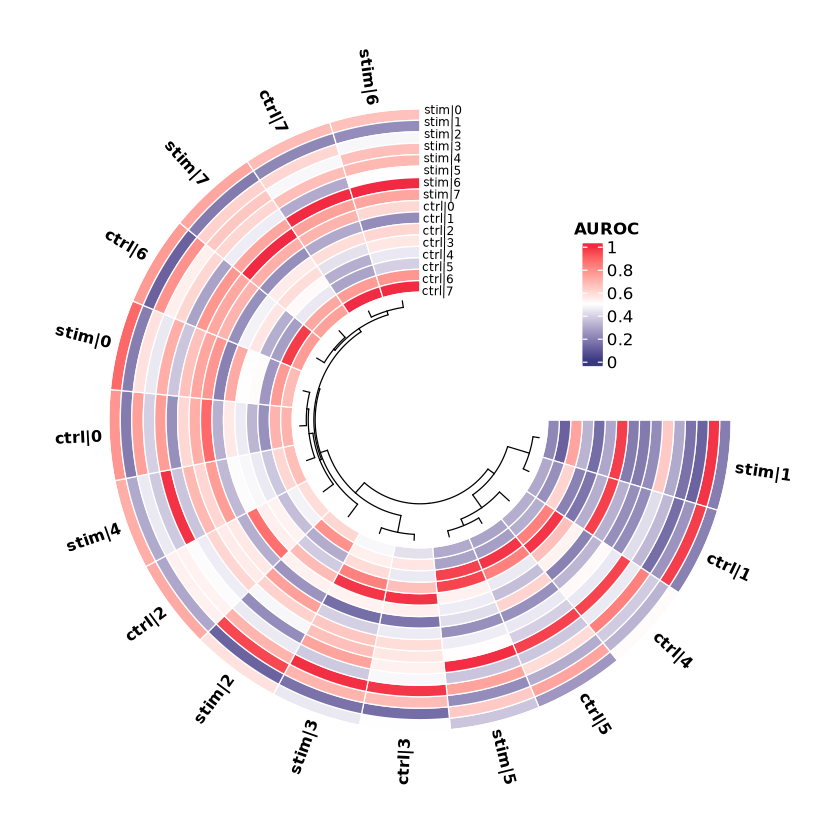

In [38]:
library(circlize)
library(ComplexHeatmap)
circos.clear()
# 定义颜色映射
mycol <- colorRamp2(c(0, 0.5, 1), c("#393781", "white", "#f22942"))
bordercol <- "white"
# 调整圆环首尾间的距离
circos.par(gap.after = c(90)) 
# 手动对列进行聚类
# 使用 hclust 进行层次聚类
# hc_col <- hclust(dist(t(celltype_NV)))  # 对列进行聚类
# hc_row <- hclust(dist(celltype_NV))    # 对行进行聚类

# # 根据聚类结果重新排列数据矩阵
# celltype_NV <- celltype_NV[, hc_col$order]  # 重新排列列
# celltype_NV <- celltype_NV[hc_row$order, ]  # 重新排列行
# 绘制环状热图
circos.heatmap(celltype_NV, col = mycol,
               # 聚类放在环形内侧
               dend.side = "inside", 
               # 基因名放在环形外侧；二者不能在同一侧
               rownames.side = "outside",
               rownames.col = "black",
               # 字体大小
               rownames.cex = 0.8, 
               # 字体粗细
               rownames.font = 2,  # 注意：字体粗细应该是一个整数，例如 1（普通）、2（加粗）
               bg.border = bordercol,
               cluster = TRUE,
               cell.border = bordercol,
               track.height = 0.5)

# 定义图例的位置
x_pos <- 0.75
y_pos <- 0.65
# 创建图例
lg <- Legend(title = "AUROC", col_fun = mycol,
             direction = "vertical",
             title_position = "topcenter")

# 绘制图例
draw(lg, x = unit(x_pos, "npc"), y = unit(y_pos, "npc"), just = c("right", "center"))

# 设置间距因子
spacing_factor <- 0.72
# 设置 y 轴偏移量，可以根据需要调整
y_offset <- 2
# 设置 x 轴偏移量，可以根据需要调整
x_offset <- -0.3
fontsize <- 0.6 # 字体大小

# 添加自定义文本
circos.track(track.index = get.current.track.index(), panel.fun = function(x, y) {
  if (CELL_META$sector.numeric.index == 1) { 
    cn <- colnames(celltype_NV)
    n <- length(cn)
    base_x <- CELL_META$cell.xlim[2] - convert_x(x_offset, "mm") 
    circos.text(rep(base_x, n), 
                y_offset + (n:1) * spacing_factor,
                cn, cex = fontsize, adj = c(0, 0.5), facing = "inside")
  }
}, bg.border = NA)
circos.clear()